## Load Data

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

In [69]:
# Load the dataset
data = pd.read_excel('data/processed_data.xlsx')
data.head()

,Unnamed: 0,Timestamp,Location,Traffic_Density,Peak_Time,Year,Month,Day,Time,Object_Type_Asteroid Mining Ship,Object_Type_Manned Spacecraft,Object_Type_Satellite,Object_Type_Scientific Probe,Object_Type_Space Debris,Object_Type_Space Station,Object_Type,Location_Encoded
0,0,2024-10-21 21:00:00,Lagrange Point L2,17,15:00:00,2024,10,21,21:00:00,False,False,False,False,False,True,Space Station,1
1,1,2024-10-11 05:00:00,Orbit LEO,21,15:00:00,2024,10,11,05:00:00,False,False,True,False,False,False,Satellite,4
2,2,2024-10-29 13:00:00,Orbit LEO,88,06:00:00,2024,10,29,13:00:00,False,False,False,False,False,True,Space Station,4
3,3,2024-10-24 08:00:00,Mars Transfer Orbit,65,08:00:00,2024,10,24,08:00:00,False,False,False,True,False,False,Scientific Probe,2
4,4,2024-10-23 17:00:00,Lagrange Point L1,9,06:00:00,2024,10,23,17:00:00,False,False,False,False,False,True,Space Station,0


In [70]:
# Features and target
features = ['Location_Encoded','Year', 'Month', 'Day', 
            'Object_Type_Asteroid Mining Ship', 'Object_Type_Manned Spacecraft', 
            'Object_Type_Satellite', 'Object_Type_Scientific Probe', 
            'Object_Type_Space Debris', 'Object_Type_Space Station']
target = 'Traffic_Density'

In [71]:
X=data[features]
y=data[target]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training and Testing

In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [74]:

# Helper function for visualization
def visualize_results(y_test, y_pred):
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.show()

    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Predicted Values")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

    sns.histplot(residuals, kde=True)
    plt.xlabel("Residuals")
    plt.title("Distribution of Residuals")
    plt.show()

# Function to evaluate model
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")


Linear Regression
Mean Absolute Error (MAE): 24.731522353621543
Mean Squared Error (MSE): 802.3211727159644
Root Mean Squared Error (RMSE): 28.3252744508498
R-squared (R²): -0.001967632061873781


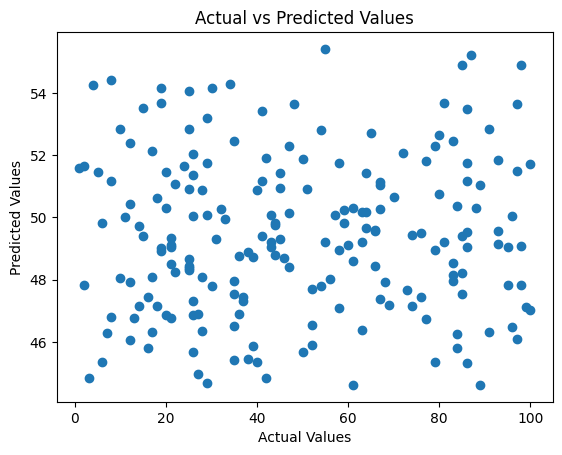

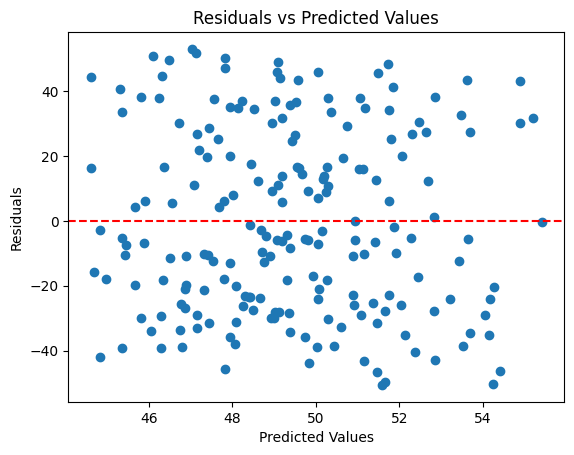

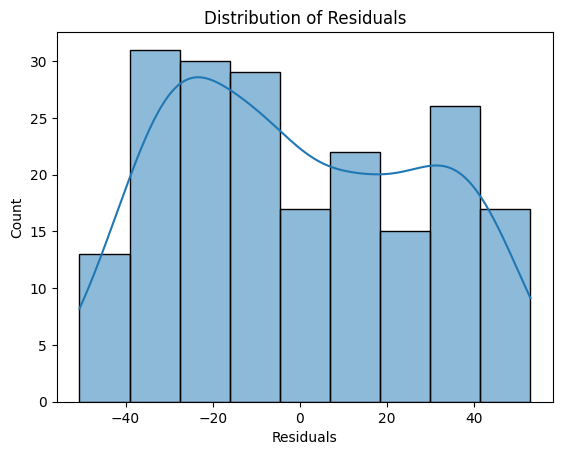

['model/linear_model.joblib']

In [75]:
print("\nLinear Regression")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
evaluate_model(y_test, y_pred)
visualize_results(y_test, y_pred)
joblib.dump(linear_model, 'model/linear_model.joblib')


Ridge Regression
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters for Ridge:  {'alpha': 100}
Mean Absolute Error (MAE): 24.751735061218668
Mean Squared Error (MSE): 801.5010455096327
Root Mean Squared Error (RMSE): 28.31079379864918
R-squared (R²): -0.0009434276125059871


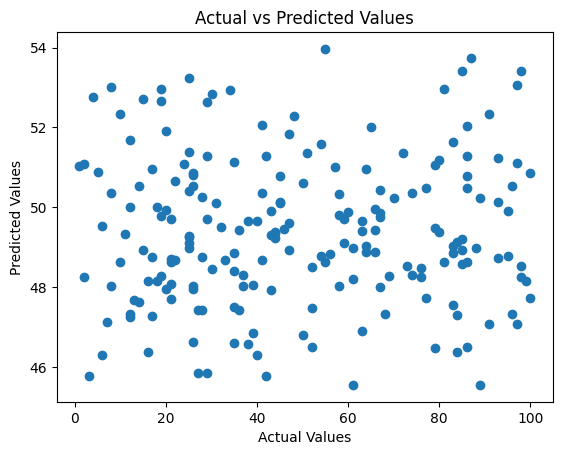

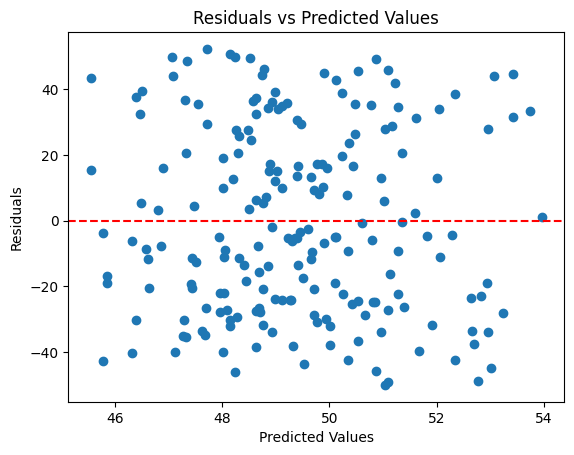

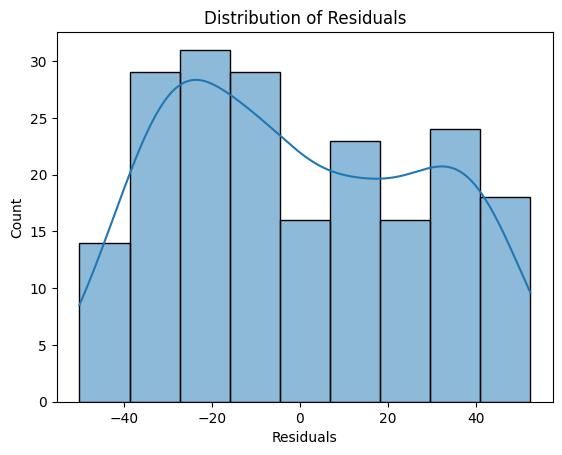

['model/ridge_model.joblib']

In [76]:
print("\nRidge Regression")
ridge_param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge_model = Ridge()
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid, cv=3, n_jobs=-1, verbose=2)
ridge_grid_search.fit(X_train, y_train)
ridge_best_params = ridge_grid_search.best_params_
print("Best parameters for Ridge: ", ridge_best_params)
ridge_model = Ridge(**ridge_best_params)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
evaluate_model(y_test, y_pred)
visualize_results(y_test, y_pred)
joblib.dump(ridge_model, 'model/ridge_model.joblib')


Lasso Regression
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters for Lasso:  {'alpha': 100}
Mean Absolute Error (MAE): 24.7729
Mean Squared Error (MSE): 801.0278265625
Root Mean Squared Error (RMSE): 28.302434993521317
R-squared (R²): -0.00035245471533040806


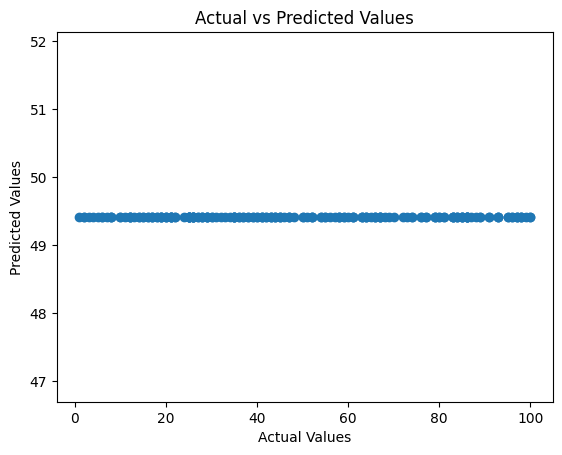

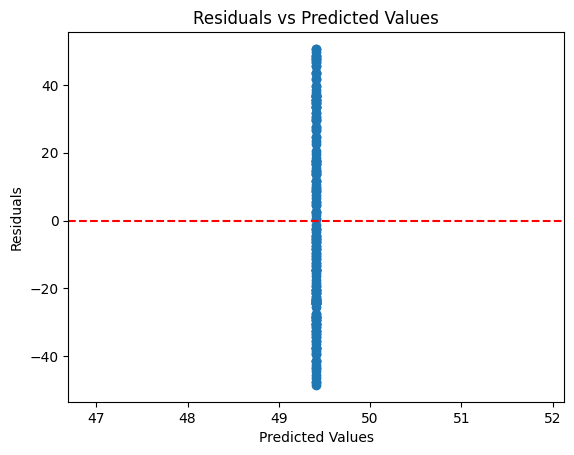

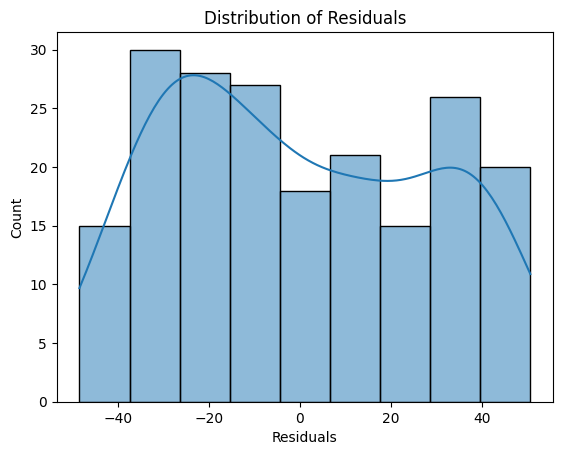

['model/lasso_model.joblib']

In [77]:
print("\nLasso Regression")
lasso_param_grid = {'alpha': [0.1, 1, 10, 100]}
lasso_model = Lasso()
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=lasso_param_grid, cv=3, n_jobs=-1, verbose=2)
lasso_grid_search.fit(X_train, y_train)
lasso_best_params = lasso_grid_search.best_params_
print("Best parameters for Lasso: ", lasso_best_params)
lasso_model = Lasso(**lasso_best_params)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
evaluate_model(y_test, y_pred)
visualize_results(y_test, y_pred)
joblib.dump(lasso_model, 'model/lasso_model.joblib')


ElasticNet Regression
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for ElasticNet:  {'alpha': 100, 'l1_ratio': 0.5}
Mean Absolute Error (MAE): 24.7729
Mean Squared Error (MSE): 801.0278265625
Root Mean Squared Error (RMSE): 28.302434993521317
R-squared (R²): -0.00035245471533040806


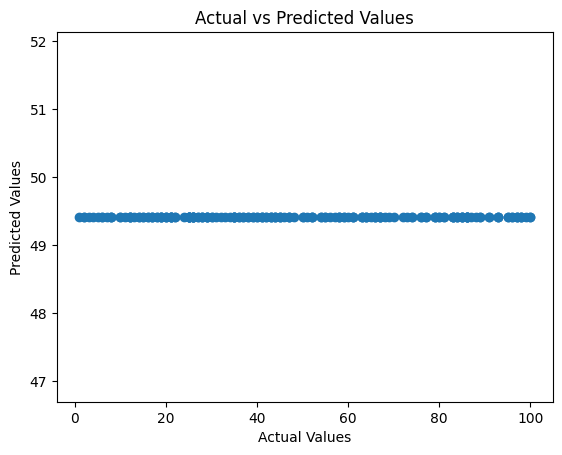

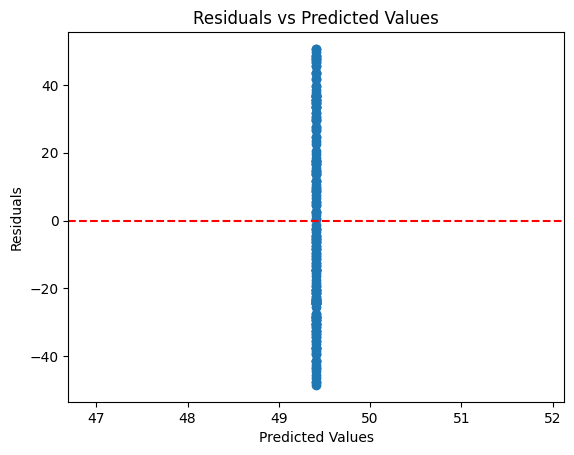

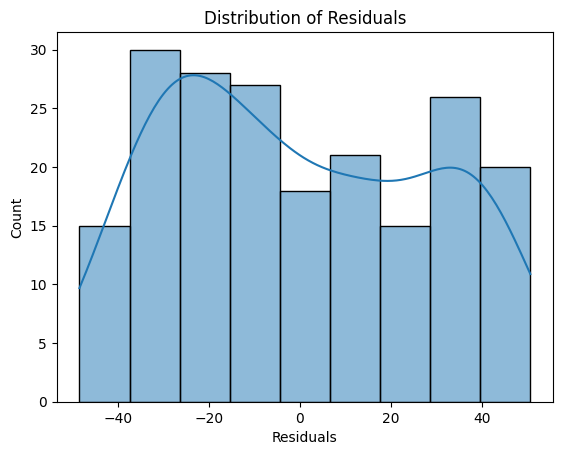

['model/elasticnet_model.joblib']

In [78]:
print("\nElasticNet Regression")
elasticnet_param_grid = {'alpha': [0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.7, 1.0]}
elasticnet_model = ElasticNet()
elasticnet_grid_search = GridSearchCV(estimator=elasticnet_model, param_grid=elasticnet_param_grid, cv=3, n_jobs=-1, verbose=2)
elasticnet_grid_search.fit(X_train, y_train)
elasticnet_best_params = elasticnet_grid_search.best_params_
print("Best parameters for ElasticNet: ", elasticnet_best_params)
elasticnet_model = ElasticNet(**elasticnet_best_params)
elasticnet_model.fit(X_train, y_train)
y_pred = elasticnet_model.predict(X_test)
evaluate_model(y_test, y_pred)
visualize_results(y_test, y_pred)
joblib.dump(elasticnet_model, 'model/elasticnet_model.joblib')

## Testing Prediction using Custom Input

In [79]:
import joblib
import pandas as pd

# Define the path to the model folder
model_folder = 'model/'

# Load saved models and encoder
try:
    linear_model = joblib.load(f'{model_folder}linear_model.pkl')
    ridge_model = joblib.load(f'{model_folder}ridge_model.pkl')
    lasso_model = joblib.load(f'{model_folder}lasso_model.pkl')
    elasticnet_model = joblib.load(f'{model_folder}elasticnet_model.pkl')
    location_encoder = joblib.load(f'{model_folder}label_encoder.pkl')
except FileNotFoundError as e:
    print(f"Error loading model or encoder: {e}. Ensure the files exist in the 'model' folder.")
    location_encoder = None

# Input data for testing
input_data = {
    'Location': ['Lagrange Point L2'],  
    'Year': [2024],
    'Month': [10],
    'Day': [21],
    'Object_Type_Asteroid Mining Ship': [False],
    'Object_Type_Manned Spacecraft': [False],
    'Object_Type_Satellite': [False],
    'Object_Type_Scientific Probe': [False],
    'Object_Type_Space Debris': [False],
    'Object_Type_Space Station': [True]
}

input_df = pd.DataFrame(input_data)

# Encode the 'Location' feature if the encoder is loaded
if location_encoder is not None:
    try:
        input_df['Location_Encoded'] = location_encoder.transform(input_df['Location'])
    except ValueError as e:
        print(f"Error encoding location: {e}. Ensure the input data matches the training data locations.")
else:
    print("Skipping encoding as location_encoder is not available.")

# Drop the original 'Location' column
if 'Location_Encoded' in input_df.columns:
    input_df = input_df.drop('Location', axis=1)

# Ensure correct column order
columns_order = [
    'Location_Encoded', 'Year', 'Month', 'Day',
    'Object_Type_Asteroid Mining Ship', 'Object_Type_Manned Spacecraft',
    'Object_Type_Satellite', 'Object_Type_Scientific Probe',
    'Object_Type_Space Debris', 'Object_Type_Space Station'
]
input_df = input_df.reindex(columns=columns_order, fill_value=0)

# Dictionary to store predictions
predictions = {}

# Test each model
try:
    predictions['Linear Regression'] = linear_model.predict(input_df)[0]
    predictions['Ridge Regression'] = ridge_model.predict(input_df)[0]
    predictions['Lasso Regression'] = lasso_model.predict(input_df)[0]
    predictions['ElasticNet Regression'] = elasticnet_model.predict(input_df)[0]
except Exception as e:
    print(f"Error during prediction: {e}. Ensure the input data format matches the training data.")

# Print predictions
for model_name, prediction in predictions.items():
    print(f"{model_name}: Predicted Traffic Density = {prediction}")


Error loading model or encoder: [Errno 2] No such file or directory: 'model/label_encoder.pkl'. Ensure the files exist in the 'model' folder.
Skipping encoding as location_encoder is not available.
Linear Regression: Predicted Traffic Density = 49.347518896742045
Ridge Regression: Predicted Traffic Density = 49.73675947141317
Lasso Regression: Predicted Traffic Density = 49.41125
ElasticNet Regression: Predicted Traffic Density = 49.41125
